In [2]:
import requests

In [ ]:
https://data.sensor.community/airrohr/v1/filter/box=50.0,30.0,60.0,80.0&country=RU


In [2]:
import requests

url = "https://data.sensor.community/airrohr/v1/filter/area=55.77,37.592,10&country=RU"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    # обработка данных
else:
    print("Ошибка при получении данных")

In [3]:
len(data)

221

In [4]:
data[240]

IndexError: list index out of range

In [5]:
import requests
import pandas as pd

url = "https://data.sensor.community/airrohr/v1/filter/box=50.0,30.0,60.0,80.0&country=RU"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame([{'id': sd['id'],
                        'value_type': sdv['value_type'],
                        'value': sdv['value'],
                        'long': sd['location']['longitude'],
                        'lat': sd['location']['latitude'],
                        'indoor': sd['location']['indoor']}
                       for sd in data for sdv in sd['sensordatavalues']])

else:
    print("Ошибка при получении данных")

In [6]:
df

,id,value_type,value,long,lat,indoor
0,20233449510,temperature,19.08,37.894,59.134,0
1,20233449510,pressure,101237.44,37.894,59.134,0
2,20233449510,humidity,38.75,37.894,59.134,0
3,20233449510,pressure_at_sealevel,102893.11,37.894,59.134,0
4,20233449500,P1,0.20,37.212,55.998,0
...,...,...,...,...,...,...
3870,20233400696,pressure,100347.72,37.462,55.872,0
3871,20233400696,humidity,27.41,37.462,55.872,0
3872,20233400696,pressure_at_sealevel,102410.34,37.462,55.872,0
3873,20233400567,P1,1.60,38.76,55.096,0


In [38]:
import requests
import pandas as pd

url = "https://data.sensor.community/airrohr/v1/filter/box=50.0,30.0,60.0,80.0&country=RU"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame([{'id': sd['id'],
                        'value_type': sdv['value_type'],
                        'value': sdv['value'],
                        'long': sd['location']['longitude'],
                        'lat': sd['location']['latitude'],
                        'indoor': sd['location']['indoor']}
                       for sd in data for sdv in sd['sensordatavalues']])
    df_pivot = df.pivot_table(index=['id', 'long', 'lat', 'indoor'], columns='value_type', values='value', aggfunc='first')
    # обработка данных
else:
    print("Ошибка при получении данных")

In [39]:
df

,id,value_type,value,long,lat,indoor
0,20232750773,temperature,21.30,73.44353675900,54.96364028899,0
1,20232750773,humidity,50.92,73.44353675900,54.96364028899,0
2,20232750767,temperature,31.89,30.35618662700,59.92415315824,0
3,20232750767,pressure,102307.00,30.35618662700,59.92415315824,0
4,20232750767,humidity,17.32,30.35618662700,59.92415315824,0
...,...,...,...,...,...,...
3979,20232701533,noise_LA_max,72.00,37.816,55.706,0
3980,20232701515,P1,0.32,37.816,55.706,0
3981,20232701515,P2,0.22,37.816,55.706,0
3982,20232701511,P1,1.95,30.27152400000,50.55604700000,0


In [12]:
import pandas as pd


df_pivot = df.pivot(index=['id', 'long', 'lat', 'indoor'], columns='value_type', values='value')

# Если нужно, можно сбросить индексы и переименовать столбцы
df_pivot = df_pivot.reset_index()
df_pivot.columns.name = None

print(df_pivot)

               id            long             lat  indoor   P0    P1    P2  \
0     20233400567           38.76          55.096       0  NaN  1.60  1.23   
1     20233400696          37.462          55.872       0  NaN   NaN   NaN   
2     20233400733  37.52009943994  55.87517995000       0  NaN  1.58  1.17   
3     20233400813          37.632          54.228       0  NaN   NaN   NaN   
4     20233400842          37.782          55.798       0  NaN  7.47  3.83   
...           ...             ...             ...     ...  ...   ...   ...   
1385  20233449429          37.664          55.536       0  NaN   NaN   NaN   
1386  20233449442  37.54126489064  55.59101044569       0  NaN   NaN   NaN   
1387  20233449492          37.904           59.12       0  NaN   NaN   NaN   
1388  20233449500          37.212          55.998       0  NaN  0.20  0.20   
1389  20233449510          37.894          59.134       0  NaN   NaN   NaN   

     counts_per_minute  humidity noise_LA_max noise_LA_min nois

In [11]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1390 entries, 0 to 1389
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    1390 non-null   int64 
 1   long                  1390 non-null   object
 2   lat                   1390 non-null   object
 3   indoor                1390 non-null   int64 
 4   P0                    73 non-null     object
 5   P1                    777 non-null    object
 6   P2                    777 non-null    object
 7   counts_per_minute     2 non-null      object
 8   humidity              551 non-null    object
 9   noise_LA_max          47 non-null     object
 10  noise_LA_min          47 non-null     object
 11  noise_LAeq            47 non-null     object
 12  pressure              496 non-null    object
 13  pressure_at_sealevel  494 non-null    object
 14  temperature           564 non-null    object
dtypes: int64(2), object(13)
memory usage: 

In [14]:
df_pivot.columns

Index(['id', 'long', 'lat', 'indoor', 'P0', 'P1', 'P2', 'counts_per_minute',
       'humidity', 'noise_LA_max', 'noise_LA_min', 'noise_LAeq', 'pressure',
       'pressure_at_sealevel', 'temperature'],
      dtype='object')

In [25]:
df_pivot_dropped = df_pivot.fillna(0)

C:\Users\user\AppData\Local\Temp\ipykernel_20736\1524169243.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_pivot_dropped = df_pivot.fillna(0)


In [28]:
df_pivot_numeric = df_pivot.apply(pd.to_numeric, errors='coerce')

In [29]:
df_pivot_numeric.describe()

,id,long,lat,indoor,P0,P1,P2,counts_per_minute,humidity,noise_LA_max,noise_LA_min,noise_LAeq,pressure,pressure_at_sealevel,temperature
count,1.390000e+03,1390.000000,1390.000000,1390.000000,73.000000,777.000000,777.000000,2.000000,543.000000,47.000000,47.000000,47.000000,496.000000,494.000000,564.000000
mean,2.023343e+10,41.354197,55.537915,0.028777,4.580822,7.026203,2.927812,13.650000,43.518267,69.658298,54.535745,61.260851,96914.887478,98636.646478,11.907766
std,1.403096e+04,10.938604,1.922593,0.167239,4.826415,17.823077,5.784655,6.151829,20.106077,14.725389,12.646861,13.400600,17035.505755,17223.624320,36.407582
min,2.023340e+10,30.112726,50.218826,0.000000,0.000000,0.000000,0.000000,9.300000,1.000000,5.000000,5.000000,5.000000,-23430.440000,-23779.050000,-149.770000
25%,2.023341e+10,37.460000,55.179056,0.000000,2.100000,2.530000,1.400000,11.475000,31.630000,70.155000,50.815000,59.450000,100181.705000,102197.747500,16.920000
50%,2.023343e+10,37.668000,55.706000,0.000000,4.000000,4.380000,2.100000,13.650000,37.070000,73.010000,56.060000,65.390000,100791.255000,102556.460000,19.105000
75%,2.023344e+10,38.838000,55.875180,0.000000,6.000000,7.100000,3.080000,15.825000,47.085000,76.275000,61.660000,67.935000,101145.915000,102785.922500,21.600000
max,2.023345e+10,73.504000,59.995300,1.000000,27.000000,453.770000,140.530000,18.000000,118.990000,82.950000,68.060000,71.030000,150630.590000,154981.880000,38.260000


In [32]:
# Определяем пороги для min и max
min_threshold = df_pivot_numeric.quantile(0.05)
max_threshold = df_pivot_numeric.quantile(0.95)

# Фильтруем данные, оставляя только значения внутри порогов
df_filtered = df_pivot_numeric[(df_pivot_numeric >= min_threshold) & (df_pivot_numeric <= max_threshold)]

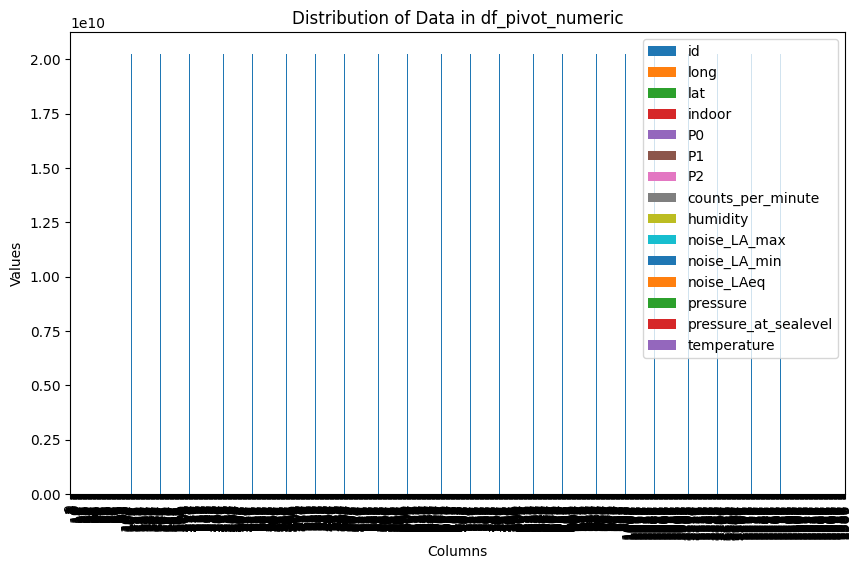

In [33]:
import matplotlib.pyplot as plt

# Предположим, что у вас есть данные data, которые содержат различные столбцы для построения графиков

# Построение гистограммы для столбца 'column1'
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.hist(data['column1'], bins=10, color='blue', alpha=0.7)
plt.title('Гистограмма для column1')

# Построение гистограммы для столбца 'column2'
plt.subplot(2, 2, 2)
plt.hist(data['column2'], bins=10, color='green', alpha=0.7)
plt.title('Гистограмма для column2')

# Построение гистограммы для столбца 'column3'
plt.subplot(2, 2, 3)
plt.hist(data['column3'], bins=10, color='red', alpha=0.7)
plt.title('Гистограмма для column3')

# Построение гистограммы для столбца 'column4'
plt.subplot(2, 2, 4)
plt.hist(data['column4'], bins=10, color='purple', alpha=0.7)
plt.title('Гистограмма для column4')

plt.tight_layout()
plt.show()

In [59]:
df_pivot['pressure_at_sealevel'].unique()

array([nan, 101196.09, 102883.51, 102626.41, 63783.06, 102815.46,
       62115.32, 102893.52, 102528.29, 102804.29, 102532.74, 102215.36,
       102455.73, 102585.34, 102598.08, 102622.21, 102397.77, 102986.13,
       102817.21, 102706.62, 102837.77, 102957.52, 102791.75, 102872.51,
       101335.6, 43845.83, 102477.05, 102620.37, -23705.39, 102926.83,
       102920.25, 102739.82, 102902.21, 67067.06, 102313.52, 102888.81,
       102051.16, 102757.65, 102625.24, 102460.97, 102793.37, 102740.62,
       102123.98, 102555.85, 102139.35, 102675.21, 102309.35, 101214.91,
       102388, 102895.61, 102499.79, 51591.84, 102865.01, 100873.71,
       102457.02, 102657.3, 100990.46, 102209.96, 102389.59, 102792.84,
       102325.86, 102561.99, 102819.34, 102894.4, 102526.87, 102870.35,
       102888.22, 102118.61, 102549.47, 101219.96, 102623.75, 102235.31,
       101136.53, 102693.64, 102786.57, 102513.45, 102898.43, 69144.95,
       102154.54, 102279.51, 102194.7, 102932.14, 102703.04, 102565.7

In [55]:
df_pivot.to_csv('sensorc.csv')

In [54]:
df_pivot

,id,long,lat,indoor,P0,P1,P2,counts_per_minute,humidity,noise_LA_max,noise_LA_min,noise_LAeq,pressure,pressure_at_sealevel,temperature
0,20232739719,37.71,55.652,0,NaN,6.20,2.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20232739748,37.864,55.63,0,NaN,2.63,1.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20232739799,37.928,59.082,0,NaN,1.20,0.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20232739831,73.504,54.918,0,NaN,NaN,NaN,NaN,51.39,NaN,NaN,NaN,99823.69,101196.09,19.65
4,20232739938,37.73473531008,55.60194616744,0,NaN,4.00,2.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,20232789880,37.894,59.134,0,NaN,8.38,2.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1437,20232789886,38.51695060730,54.85361578212,0,NaN,NaN,NaN,NaN,100.00,NaN,NaN,NaN,-23370.19,-23720.27,3.74
1438,20232789893,37.934,59.144,0,NaN,9.73,5.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1439,20232789894,37.46,55.698,0,NaN,NaN,NaN,NaN,32.28,NaN,NaN,NaN,100633.69,102479.76,18.91
